In [98]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [99]:
(x_img_train,y_label_train),\
(x_img_test,y_label_test)=cifar10.load_data()


In [100]:
print("train data:",'image:',x_img_train.shape,"labels:",y_label_train.shape)
print("test data:",'image:',x_img_test.shape,"labels:",y_label_test.shape)
label_dict={0:"airplane",1:"car", 2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
x_img_train_normalize =x_img_train.astype('float32')/255.0
x_img_test_normalize =x_img_test.astype('float32')/255.0
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
%matplotlib inline
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig =plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
            ax=plt.subplot(5,5, 1+i)
            ax.imshow(images[idx], cmap='binary')
            title= str(i)+','+label_dict[labels[i][0]]
            if len(prediction)>0:
                title+='=>'+label_dict[prediction[i]]
            
            ax.set_title(title,fontsize=10)
            ax.set_xticks([]);ax.set_yticks([])
            idx+=1
            plt.show()

train data: image: (50000, 32, 32, 3) labels: (50000, 1)
test data: image: (10000, 32, 32, 3) labels: (10000, 1)


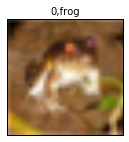

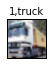

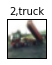

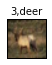

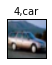

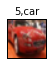

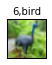

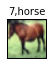

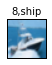

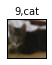

In [101]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)
from keras.utils import np_utils
y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [103]:
model =Sequential()

In [104]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3),
                 activation='relu',
                 padding='same'))

In [105]:
model.add(Dropout(rate=0.3))

In [106]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [107]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

In [108]:
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu',
                 padding='same'))

In [109]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [110]:
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 input_shape=(32, 32,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dropout(rate=0.3))

In [111]:
model.add(Dense(2500, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(rate=0.3))

In [112]:
model.add(Dense(10, activation='softmax'))

In [113]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [120]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("load previous model")
except:
    print("fail to load model, retraining for a new one")

fail to load model, retraining for a new one


In [115]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,validation_split=0.2,epochs=5, batch_size=300,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 353s - loss: 1.9021 - acc: 0.2886 - val_loss: 1.6976 - val_acc: 0.3780
Epoch 2/5
40000/40000 [==============================] - 357s - loss: 1.4652 - acc: 0.4596 - val_loss: 1.3337 - val_acc: 0.5167
Epoch 3/5
40000/40000 [==============================] - 360s - loss: 1.2614 - acc: 0.5426 - val_loss: 1.1758 - val_acc: 0.5703
Epoch 4/5
40000/40000 [==============================] - 364s - loss: 1.1178 - acc: 0.6016 - val_loss: 1.0230 - val_acc: 0.6393
Epoch 5/5
40000/40000 [==============================] - 379s - loss: 1.0045 - acc: 0.6409 - val_loss: 0.9324 - val_acc: 0.6768


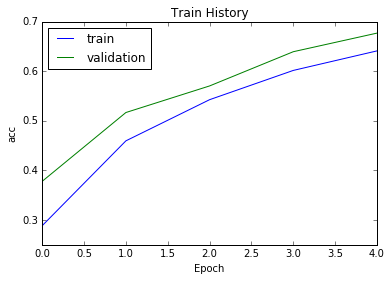

In [124]:


%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
show_train_history(train_history,'acc','val_acc')

In [122]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot, verbose=0)
scores[1]

0.66769999999999996